# Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


# Load CIFAR-10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Normalize the Data

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

#Build the CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#Train the Model

In [6]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.3430 - loss: 1.7771 - val_accuracy: 0.5439 - val_loss: 1.2666
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.5646 - loss: 1.2294 - val_accuracy: 0.6008 - val_loss: 1.1296
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6234 - loss: 1.0666 - val_accuracy: 0.6363 - val_loss: 1.0258
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6620 - loss: 0.9599 - val_accuracy: 0.6522 - val_loss: 0.9904
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6870 - loss: 0.8852 - val_accuracy: 0.6742 - val_loss: 0.9302
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7124 - loss: 0.8193 - val_accuracy: 0.6814 - val_loss: 0.9212
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7308 - loss: 0.7657 - val_accuracy: 0.7002 - val_loss: 0.8577
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7469 -

# Pick a Test Image (From x_test)

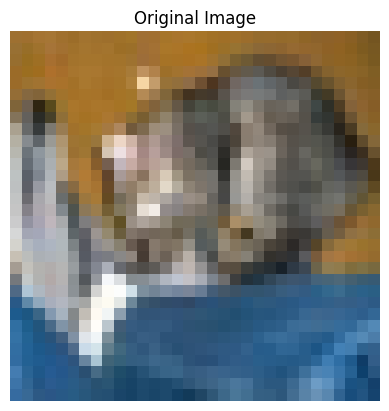

In [14]:
image_index = 0
img = x_test[image_index]
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Make Prediction

In [15]:
img_batch = np.expand_dims(img, axis=0)
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


# Show the Result

In [16]:
print("Predicted Class:", class_names[predicted_class])
print("Actual Class:   ", class_names[y_test[image_index][0]])


Predicted Class: cat
Actual Class:    cat


# Evaluate the Model

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 3s - 11ms/step - accuracy: 0.4688 - loss: 198.0382

Test accuracy: 0.46880000829696655


# Plot Training and Validation Accuracy

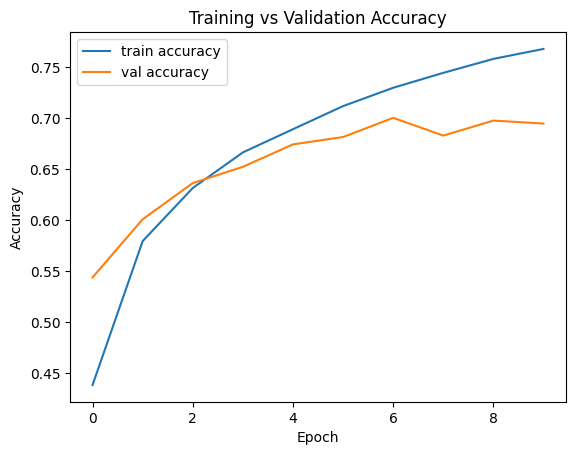

In [18]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


# This project demonstrates image classification using a Convolutional Neural Network (CNN) on the CIFAR-10 dataset. The model is trained to recognize 10 different object categories such as airplane, cat, and truck. TensorFlow and Keras are used to build and train the model. The final accuracy shows the effectiveness of CNNs for image recognition tasks.